<a href="https://colab.research.google.com/github/BhargavPalaketi/MachineLearning/blob/main/ModelEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [18]:
#multi-class classification dataset of handwritten number from 0-9
dataset = load_digits()
X, y = dataset.data, dataset.target

In [19]:
# code to know the distribution of classes
for class_name,class_count in zip(dataset.target_names,np.bincount(dataset.target)):
  print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [20]:
# let us create a imbalanced targets by classifying,
# all the labels that are not 1 as negative class(i.e. "0")

y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels: ',y[1:30])
print('New labels:      ',y_binary_imbalanced[1:30])



Original labels:  [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New labels:       [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [21]:
np.bincount(y_binary_imbalanced)

array([1615,  182])

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y_binary_imbalanced,
                                                    random_state = 0)

svm = SVC(kernel = 'rbf', C =1).fit(X_train,y_train)
svm_predicted = svm.predict(X_test)
svm.score(X_test,y_test)

0.9955555555555555

 ## Dummy Classifiers

In [23]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train,y_train)

y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

 ### Confusion Matrix:
 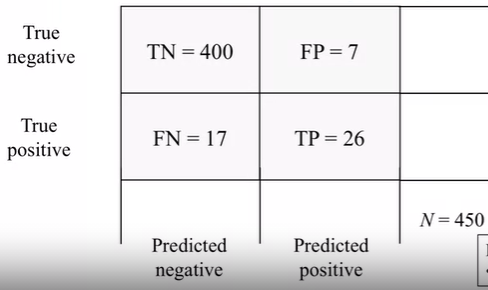

In [24]:
dummy_majority.score(X_test,y_test)

0.9044444444444445

In [25]:
from sklearn.metrics import confusion_matrix

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)

y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 2).fit(X_train,y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n',
      confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


 ### Evaluation metrics for binary classification

In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print('Accuracy:  {:.2f}'.format(accuracy_score(y_test,tree_predicted )))
print('Precision:  {:.2f}'.format(precision_score(y_test,tree_predicted )))
print('Recall:  {:.2f}'.format(recall_score(y_test,tree_predicted )))
print('F1_Score:  {:.2f}'.format(f1_score(y_test,tree_predicted )))

Accuracy:  0.95
Precision:  0.79
Recall:  0.60
F1_Score:  0.68


 ### To compute all of this metrics at once we use classification_report function

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names = {'not 1','1'}))

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       407
       not 1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [29]:
# suport shopws the number of true lables in the test_set

In [30]:
print('Classification Reports for different models\n')
print('Random Class Proportional (dummy)\n',
      classification_report(y_test, y_majority_predicted, target_names = {'not 1','1'}))

print('SVM \n',
      classification_report(y_test, svm_predicted, target_names = {'not 1','1'}))

print('Decision tree\n',
      classification_report(y_test, tree_predicted, target_names = {'not 1','1'}))

Classification Reports for different models

Random Class Proportional (dummy)
               precision    recall  f1-score   support

           1       0.90      1.00      0.95       407
       not 1       0.00      0.00      0.00        43

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.82      0.90      0.86       450

SVM 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       407
       not 1       1.00      0.95      0.98        43

    accuracy                           1.00       450
   macro avg       1.00      0.98      0.99       450
weighted avg       1.00      1.00      1.00       450

Decision tree
               precision    recall  f1-score   support

           1       0.96      0.98      0.97       407
       not 1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 ### Decision Functions

In [31]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,y_binary_imbalanced,
                                                    random_state = 0)
lr  = LogisticRegression(max_iter = 1000).fit(X_train,y_train)
y_scores_lr = lr.decision_function(X_test)
y_scores_list = list(zip(y_test,y_scores_lr))
y_scores_list[0:20]

[(0, -34.62965251715387),
 (0, -18.00710189145109),
 (0, -20.988652510884364),
 (0, -36.81475273707072),
 (0, -39.34052770966422),
 (0, -18.86401210271846),
 (1, 6.00209778367665),
 (0, -32.728067269954025),
 (0, -35.48770649439418),
 (0, -37.35612652392992),
 (0, -25.031654624437433),
 (0, -21.402724114279327),
 (0, -36.510711972661504),
 (0, -15.923500682245841),
 (0, -12.840715945923545),
 (0, -13.727416129759074),
 (1, 14.769298407410023),
 (0, -39.40761878266293),
 (0, -26.109597780480243),
 (0, -28.43756047452812)]

In [34]:
# preict_prob function tell us the Predicted Probability of Class Membership

X_train, X_test, y_train, y_test = train_test_split(X,y_binary_imbalanced,
                                                    random_state = 0)
y_proba_lr = LogisticRegression(max_iter = 1000).fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20],y_proba_lr[0:20,1]))

y_proba_list

[(0, 9.131308204909588e-16),
 (0, 1.512220102166667e-08),
 (0, 7.669093481894798e-10),
 (0, 1.0269659245898714e-16),
 (0, 8.215346784973234e-18),
 (0, 6.418944703630233e-09),
 (1, 0.9975325456496914),
 (0, 6.114782039708659e-15),
 (0, 3.8715501930294285e-16),
 (0, 5.97641002227618e-17),
 (0, 1.3455211343365045e-11),
 (0, 5.068915123671552e-10),
 (0, 1.3918718769334918e-16),
 (0, 1.2148186996103043e-07),
 (0, 2.6506157232919956e-06),
 (0, 1.0920900487132936e-06),
 (1, 0.9999996147212707),
 (0, 7.682253212927166e-18),
 (0, 4.578737638915673e-12),
 (0, 4.4640022735828206e-13)]

 # Multi-Class Evaluation

Text(0.5, 15.0, 'Predicted Label')

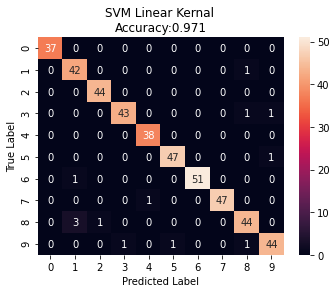

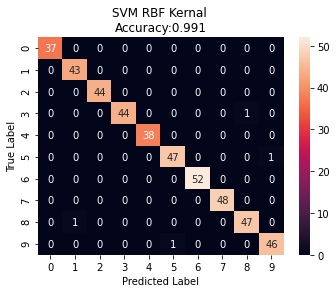

In [43]:
mc_dataset = load_digits()

X,y = mc_dataset.data, mc_dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X,y,
                                                                random_state= 0)

svm = SVC(kernel = 'linear').fit(X_train_mc,y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc)

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernal \nAccuracy:{0:.3f}'.
          format(accuracy_score(y_test_mc,svm_predicted_mc)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')


svm = SVC(kernel = 'rbf').fit(X_train_mc,y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc)

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernal \nAccuracy:{0:.3f}'.
          format(accuracy_score(y_test_mc,svm_predicted_mc)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')



 ### Multi-class Classification report

In [44]:
print(classification_report(y_test_mc,svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [45]:
#micro vs macro averaged metrics

print('Micro-averaged precision = {:.2f} (treat instances equally)'.
      format(precision_score(y_test_mc, svm_predicted_mc,average='micro')))

print('Macro-averaged precision = {:.2f} (treat instances equally)'.
      format(precision_score(y_test_mc, svm_predicted_mc,average='macro')))

Micro-averaged precision = 0.99 (treat instances equally)
Macro-averaged precision = 0.99 (treat instances equally)
